### Simulation Study explaining bias variance tradeoff

<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/bias_variance/Bias_Variance_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simulation study to explain the bias variance tradeoff. 

Based on a study done by Beate Sick done in R.

In [67]:
# Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

#To make ploting consitent
sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline
plt.style.use('default')
np.random.seed(42)
from sklearn.linear_model import LinearRegression

((200, 1), (200, 1))

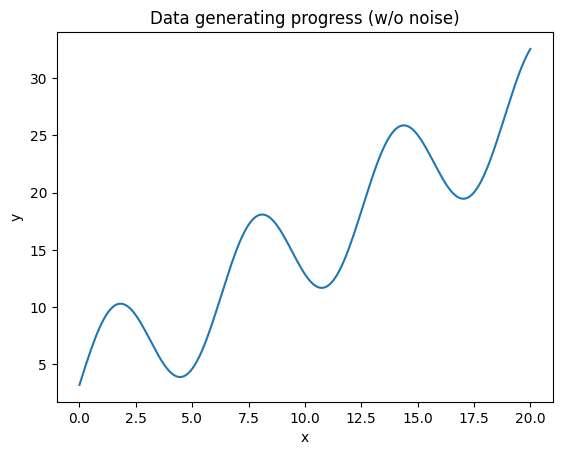

In [68]:
N = 200
x = np.linspace(0,20,num=N).reshape(-1,1)
y = 5*np.sin(x) + 1.24*x+3.2
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data generating progress (w/o noise)')
x.shape,y.shape

Text(0.5, 1.0, 'Some training data (eps=0)')

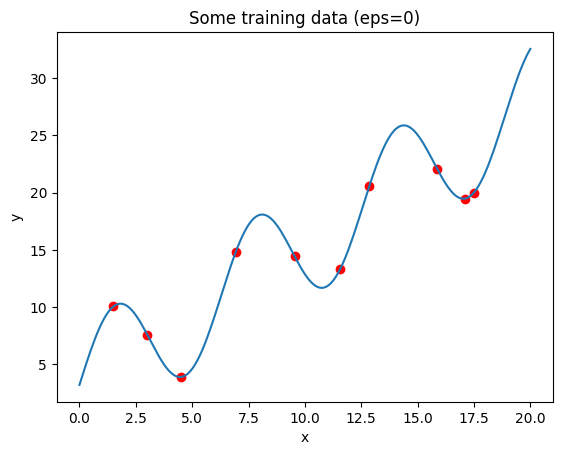

In [69]:
def get_training(n_train=10, eps=0.0):
    idx = np.random.permutation(N)[0:n_train] #10 Random training points
    return x[idx],y[idx,0] + np.random.normal(loc=0,scale=eps,size=n_train) 

eps=0
xt,yt = get_training()
plt.plot(x,y)
plt.scatter(xt, yt, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Some training data (eps={eps})')

### Fitting two models to the data


In [70]:
# Linear model
def get_lin_pred(xt,yt,x):
    model = LinearRegression()
    model.fit(xt, yt) 
    return model.predict(x.reshape(-1,1))

Text(0, 0.5, 'y')

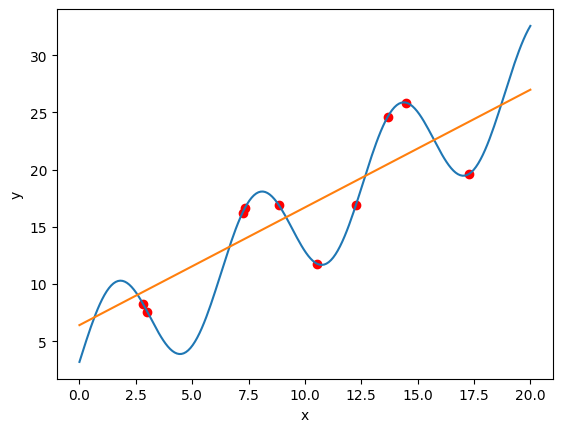

In [71]:
xt,yt = get_training()
y_pred_lin = get_lin_pred(xt,yt,x)
plt.plot(x,y)
plt.scatter(xt, yt, color='r')
plt.plot(x,y_pred_lin)
plt.xlabel('x')
plt.ylabel('y')

In [72]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly_t = polynomial_features.fit_transform(xt)
np.round(x_poly_t[0:3,],2)

array([[1.00000e+00, 1.44700e+01, 2.09450e+02, 3.03123e+03],
       [1.00000e+00, 2.81000e+00, 7.92000e+00, 2.22800e+01],
       [1.00000e+00, 1.72900e+01, 2.98820e+02, 5.16554e+03]])

In [73]:
def get_poly_pred(xt,yt,x):
    polynomial_features= PolynomialFeatures(degree=8)
    x_poly_t = polynomial_features.fit_transform(xt)
    model = LinearRegression()
    model.fit(x_poly_t, yt)
    x_poly = polynomial_features.fit_transform(x)
    return model.predict(x_poly)

### Training 
Let the following code run serveral times. 

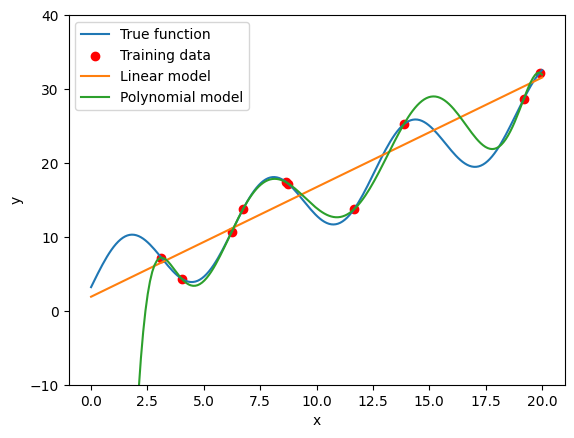

In [74]:
## Let this run a few time
xt,yt = get_training()
y_pred_lin = get_lin_pred(xt,yt,x)
y_pred_poly = get_poly_pred(xt,yt,x)
plt.plot(x,y, label='True function')
plt.scatter(xt, yt, color='r', label='Training data')
plt.plot(x,y_pred_lin, label='Linear model')
plt.plot(x,y_pred_poly, label='Polynomial model')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,40)
plt.legend()

Conclusion: 

* Flexible model 
    * Goes thru all training points. No sysmatic error **no bias**. 
    * Quite different from run to run. High **high variance**.
    * Only good on training point. 
    * Quite disapointing on other (test) data
    * Low Bias, high variance
    
* Simple model
    * Does not fit the training data perfectly. Systematic error **strong bias**.
    * Less variance from run to run. Low **Low variance**.

### Evaluation of the predictions (several runs)

We now evaluate the predictions of the two models on the **unseen test data**. At `num_te` test points, equally spaced on the x-axis

In [75]:
runs   = 100
num_te = 30 #Number of test-points
x_te = np.linspace(0,20,num_te).reshape(-1,1)
y_te_lin = np.zeros((runs,num_te))
y_te_poly = np.zeros((runs,num_te))
for r in range(runs):
    xt,yt = get_training()
    y_te_lin[r] = get_lin_pred(xt,yt,x_te)
    y_te_poly[r] = get_poly_pred(xt,yt,x_te)

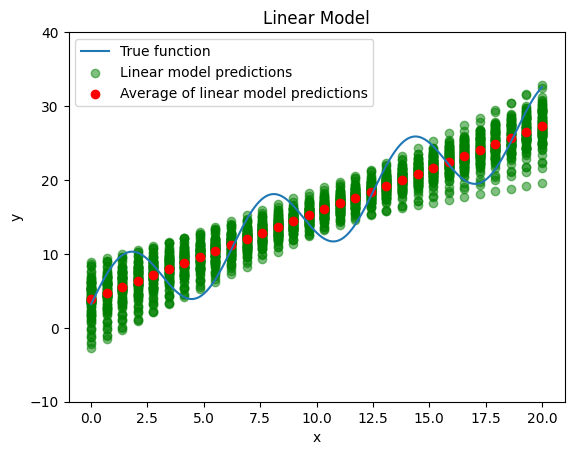

In [76]:
plt.plot(x,y, label='True function')
for i in range(runs):
    if (i == 0):
        plt.scatter(x_te,y_te_lin[i], color='g', alpha=0.5, label='Linear model predictions')
    else:
        plt.scatter(x_te,y_te_lin[i], color='g', alpha=0.5)
plt.scatter(x_te,np.average(y_te_lin,axis=0), color='r', label='Average of linear model predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Model')
plt.ylim(-10,40)
plt.legend()



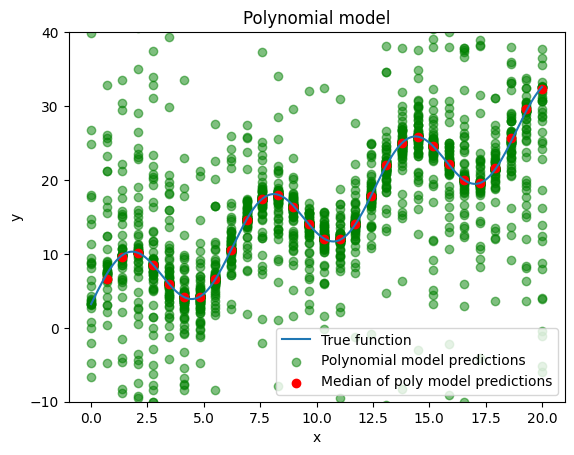

In [77]:
plt.plot(x,y, label='True function')
#plt.scatter(x_te,np.mean(y_te_lin,axis=0))
for i in range(runs):
    if (i == 0):
        plt.scatter(x_te,y_te_poly[i], color='g', alpha=0.5, label='Polynomial model predictions')
    else:
        plt.scatter(x_te,y_te_poly[i], color='g', alpha=0.5)
   
#In this case we use the median instead of the average since we don't want to be affected by outliers
#plt.scatter(x_te,np.average(y_te_poly,axis=0), color='r') 
plt.scatter(x_te,np.median(y_te_poly,axis=0), color='r', label='Median of poly model predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial model')
plt.ylim(-10,40)
plt.legend()